## Загрузим нужные библиотеки

In [100]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
import numpy as np
from sklearn.metrics import f1_score

%matplotlib inline

In [101]:
df = pd.read_csv("/content/train_dataset_train.csv")

## Рассмотрим датасет

In [102]:
df.head()

,ID,Код_группы,Год_Поступления,Пол,Основания,Изучаемый_Язык,Дата_Рождения,Уч_Заведение,Где_Находится_УЗ,Год_Окончания_УЗ,...,Общежитие,Наличие_Матери,Наличие_Отца,Страна_Родители,Опекунство,Село,Иностранец,КодФакультета,СрБаллАттестата,Статус
0,72716,16019,2015,Жен,ОО,Английский язык,1998-02-08 00:00:00.000,"МБОУ ""СОШ №59""","Алтайский край, Барнаул г",2014.0,...,0.0,0,0.0,Россия,0.0,0.0,0.0,41.0,4.294,3
1,63306,14895,2010,Муж,ЦН,NaN,1992-04-18 00:00:00.000,NaN,NaN,NaN,...,0.0,1,1.0,Россия,0.0,0.0,0.0,28.0,67.000,4
2,82469,20103,2017,Жен,ДН,Английский язык,1999-03-21 00:00:00.000,МБОУ Алтайская СОШ №5,"Алтайский край, Алтайский р-н, Алтайское с",2017.0,...,0.0,1,1.0,Россия,0.0,0.0,0.0,41.0,4.133,4
3,81661,19838,2017,Жен,БН,Английский язык,1994-12-08 00:00:00.000,ФГБОУ ВО Алтайский государственный университет,"Алтайский край, г. Барнаул",2017.0,...,0.0,1,1.0,Россия,0.0,0.0,0.0,35.0,74.000,4
4,81509,19803,2017,Жен,БН,Английский язык,1995-06-28 00:00:00.000,ФГБОУ ВО Алтайский государственный университет,"Алтайский край, г. Барнаул",2017.0,...,0.0,1,1.0,Россия,0.0,0.0,0.0,28.0,53.000,4


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13584 entries, 0 to 13583
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                13584 non-null  int64  
 1   Код_группы        13584 non-null  int64  
 2   Год_Поступления   13584 non-null  int64  
 3   Пол               13577 non-null  object 
 4   Основания         13584 non-null  object 
 5   Изучаемый_Язык    12758 non-null  object 
 6   Дата_Рождения     13584 non-null  object 
 7   Уч_Заведение      12351 non-null  object 
 8   Где_Находится_УЗ  12203 non-null  object 
 9   Год_Окончания_УЗ  12284 non-null  float64
 10  Пособие           12576 non-null  float64
 11  Страна_ПП         13237 non-null  object 
 12  Регион_ПП         12966 non-null  object 
 13  Город_ПП          13141 non-null  object 
 14  Общежитие         13498 non-null  float64
 15  Наличие_Матери    13584 non-null  int64  
 16  Наличие_Отца      13584 non-null  float6

In [104]:
df.value_counts('Основания')

Основания
ОО    5084
СН    4558
БН    1882
ДН    1853
ЦН     207
dtype: int64

In [105]:
df.value_counts('Страна_Родители')

Страна_Родители
Россия                    12239
Казахстан                   514
Китай                       147
Таджикистан                 133
Кыргызстан                   37
Киргизия                     31
Туркменистан                  5
Армения                       3
Кыргызская Республика         3
Узбекистан                    3
Монголия                      2
Республика Таджикистан        2
Украина                       1
Нигерия                       1
Республика Молдова            1
Республика Казахстан          1
Германия                      1
КНР                           1
казахстан                     1
dtype: int64

##Произведем замены 

In [106]:
df['Страна_Родители'] = df['Страна_Родители'].replace({'казахстан': "Казахстан", 'Кыргызская Республика': "Кыргызстан", 'Республика Таджикистан' : "Таджикистан", "Республика Казахстан" : "Казахстан", "Республика Молдова" : "Молдова"})

In [107]:
df.value_counts('Страна_Родители')

Страна_Родители
Россия          12239
Казахстан         516
Китай             147
Таджикистан       135
Кыргызстан         40
Киргизия           31
Туркменистан        5
Армения             3
Узбекистан          3
Монголия            2
Германия            1
КНР                 1
Молдова             1
Нигерия             1
Украина             1
dtype: int64

In [108]:
import pandas as pd
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
df['Страна_Родители']=le.fit_transform(df['Страна_Родители'].values)
df['Страна_Родители'].value_counts()

10    12239
3       516
15      458
5       147
11      135
6        40
4        31
12        5
0         3
13        3
8         2
1         1
7         1
9         1
14        1
2         1
Name: Страна_Родители, dtype: int64

In [109]:
df = df[pd.to_numeric(df['Основания'], errors='coerce').isna()]

In [110]:
df.value_counts('Основания')

Основания
ОО    5084
СН    4558
БН    1882
ДН    1853
ЦН     207
dtype: int64

In [111]:
df['Основания']=le.fit_transform(df['Основания'].values)
df['Основания'].value_counts()

2    5084
3    4558
0    1882
1    1853
4     207
Name: Основания, dtype: int64

In [112]:
df['Изучаемый_Язык'] = df['Изучаемый_Язык'].replace(np.nan, "0")

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13584 entries, 0 to 13583
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                13584 non-null  int64  
 1   Код_группы        13584 non-null  int64  
 2   Год_Поступления   13584 non-null  int64  
 3   Пол               13577 non-null  object 
 4   Основания         13584 non-null  int64  
 5   Изучаемый_Язык    13584 non-null  object 
 6   Дата_Рождения     13584 non-null  object 
 7   Уч_Заведение      12351 non-null  object 
 8   Где_Находится_УЗ  12203 non-null  object 
 9   Год_Окончания_УЗ  12284 non-null  float64
 10  Пособие           12576 non-null  float64
 11  Страна_ПП         13237 non-null  object 
 12  Регион_ПП         12966 non-null  object 
 13  Город_ПП          13141 non-null  object 
 14  Общежитие         13498 non-null  float64
 15  Наличие_Матери    13584 non-null  int64  
 16  Наличие_Отца      13584 non-null  float6

In [114]:
df.value_counts('Изучаемый_Язык')

Изучаемый_Язык
Английский язык                  10450
Немецкий язык                     2219
0                                  826
Французский язык                    54
Русский язык                        11
Англиийский                         10
Иностранный язык (Английский)       10
Иностранный язык (Немецкий)          4
dtype: int64

In [115]:
df.shape

(13584, 24)

In [116]:
df['Изучаемый_Язык'] = df['Изучаемый_Язык'].replace({'Иностранный язык (Английский)': "Английский язык", 'Иностранный язык (Немецкий)': "Немецкий язык", 'Англиийский' : "Английский язык", "Английский, немецкий языки" : np.nan})

In [117]:
df.value_counts('Изучаемый_Язык')

Изучаемый_Язык
Английский язык     10470
Немецкий язык        2223
0                     826
Французский язык       54
Русский язык           11
dtype: int64

In [118]:
df['Изучаемый_Язык']=le.fit_transform(df['Изучаемый_Язык'].values)
df['Изучаемый_Язык'].value_counts()

1    10470
2     2223
0      826
4       54
3       11
Name: Изучаемый_Язык, dtype: int64

In [119]:
df['Пол'] = df['Пол'].replace({'муж': "Муж", 'жен': "Жен"})

In [120]:
df.value_counts('Пол')

Пол
Жен    8133
Муж    5444
dtype: int64

In [121]:
df.value_counts('Пол')

Пол
Жен    8133
Муж    5444
dtype: int64

In [122]:
df['Пол']=le.fit_transform(df['Пол'].values)
df['Пол'].value_counts()

0    8133
1    5444
2       7
Name: Пол, dtype: int64

In [123]:
correlation = df.corr()["Статус"]
correlation

ID                 -0.265286
Код_группы         -0.184447
Год_Поступления    -0.234061
Пол                -0.127590
Основания          -0.133212
Изучаемый_Язык     -0.028610
Год_Окончания_УЗ   -0.101810
Пособие                  NaN
Общежитие          -0.036606
Наличие_Матери     -0.028311
Наличие_Отца       -0.029946
Страна_Родители     0.040450
Опекунство         -0.031248
Село                0.015433
Иностранец         -0.083175
КодФакультета      -0.045014
СрБаллАттестата    -0.034221
Статус              1.000000
Name: Статус, dtype: float64

In [124]:
df.shape

(13584, 24)

In [125]:
df.isnull().sum()

ID                     0
Код_группы             0
Год_Поступления        0
Пол                    0
Основания              0
Изучаемый_Язык         0
Дата_Рождения          0
Уч_Заведение        1233
Где_Находится_УЗ    1381
Год_Окончания_УЗ    1300
Пособие             1008
Страна_ПП            347
Регион_ПП            618
Город_ПП             443
Общежитие             86
Наличие_Матери         0
Наличие_Отца           0
Страна_Родители        0
Опекунство             0
Село                  86
Иностранец           310
КодФакультета          0
СрБаллАттестата        0
Статус                 0
dtype: int64

In [126]:
df['Пособие'] = df['Пособие'].fillna(0)
df['Общежитие'] = df['Общежитие'].fillna(0)
df['Село'] = df['Село'].fillna(0)
df['Иностранец'] = df['Иностранец'].fillna(0)

In [127]:
df.isnull().sum()

ID                     0
Код_группы             0
Год_Поступления        0
Пол                    0
Основания              0
Изучаемый_Язык         0
Дата_Рождения          0
Уч_Заведение        1233
Где_Находится_УЗ    1381
Год_Окончания_УЗ    1300
Пособие                0
Страна_ПП            347
Регион_ПП            618
Город_ПП             443
Общежитие              0
Наличие_Матери         0
Наличие_Отца           0
Страна_Родители        0
Опекунство             0
Село                   0
Иностранец             0
КодФакультета          0
СрБаллАттестата        0
Статус                 0
dtype: int64

In [128]:
df.shape

(13584, 24)

In [129]:
df.head(5)

,ID,Код_группы,Год_Поступления,Пол,Основания,Изучаемый_Язык,Дата_Рождения,Уч_Заведение,Где_Находится_УЗ,Год_Окончания_УЗ,...,Общежитие,Наличие_Матери,Наличие_Отца,Страна_Родители,Опекунство,Село,Иностранец,КодФакультета,СрБаллАттестата,Статус
0,72716,16019,2015,0,2,1,1998-02-08 00:00:00.000,"МБОУ ""СОШ №59""","Алтайский край, Барнаул г",2014.0,...,0.0,0,0.0,10,0.0,0.0,0.0,41.0,4.294,3
1,63306,14895,2010,1,4,0,1992-04-18 00:00:00.000,NaN,NaN,NaN,...,0.0,1,1.0,10,0.0,0.0,0.0,28.0,67.000,4
2,82469,20103,2017,0,1,1,1999-03-21 00:00:00.000,МБОУ Алтайская СОШ №5,"Алтайский край, Алтайский р-н, Алтайское с",2017.0,...,0.0,1,1.0,10,0.0,0.0,0.0,41.0,4.133,4
3,81661,19838,2017,0,0,1,1994-12-08 00:00:00.000,ФГБОУ ВО Алтайский государственный университет,"Алтайский край, г. Барнаул",2017.0,...,0.0,1,1.0,10,0.0,0.0,0.0,35.0,74.000,4
4,81509,19803,2017,0,0,1,1995-06-28 00:00:00.000,ФГБОУ ВО Алтайский государственный университет,"Алтайский край, г. Барнаул",2017.0,...,0.0,1,1.0,10,0.0,0.0,0.0,28.0,53.000,4


In [130]:
df.describe()

,ID,Код_группы,Год_Поступления,Пол,Основания,Изучаемый_Язык,Год_Окончания_УЗ,Пособие,Общежитие,Наличие_Матери,Наличие_Отца,Страна_Родители,Опекунство,Село,Иностранец,КодФакультета,СрБаллАттестата,Статус
count,13584.000000,13584.000000,13584.000000,13584.000000,13584.000000,13584.000000,12284.000000,13584.0,13584.000000,13584.000000,13584.000000,13584.000000,13584.000000,13584.000000,13584.000000,13584.000000,13584.000000,13584.000000
mean,70096.056905,18302.499926,2014.992123,0.401796,1.952518,1.116387,2013.876018,0.0,0.218492,0.511484,0.509570,9.830683,0.000442,0.227989,0.068978,32.500368,73.223274,3.426458
std,12705.894531,2540.417956,2.595339,0.491329,1.041592,0.499944,4.247111,0.0,0.413238,0.499886,0.499927,1.767552,0.021013,0.419551,0.253426,8.458150,258.045027,1.071765
min,44632.000000,11550.000000,2001.000000,0.000000,0.000000,0.000000,1973.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.000000,0.000000,-1.000000
25%,63496.750000,16901.000000,2013.000000,0.000000,1.000000,1.000000,2013.000000,0.0,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,26.000000,47.000000,3.000000
50%,71401.500000,18534.500000,2015.000000,0.000000,2.000000,1.000000,2015.000000,0.0,0.000000,1.000000,1.000000,10.000000,0.000000,0.000000,0.000000,28.000000,61.000000,4.000000
75%,78404.250000,20599.000000,2016.000000,1.000000,3.000000,1.000000,2016.000000,0.0,0.000000,1.000000,1.000000,10.000000,0.000000,0.000000,0.000000,40.000000,75.000000,4.000000
max,264403.000000,22824.000000,2212.000000,2.000000,4.000000,4.000000,2020.000000,0.0,1.000000,1.000000,1.000000,15.000000,1.000000,1.000000,1.000000,53.000000,5000.000000,4.000000


Заменим все пропуски в данных

In [131]:
df = df.fillna(0)

In [132]:
df.isnull().any()
# Дата_Рождения  Страна_Родители

ID                  False
Код_группы          False
Год_Поступления     False
Пол                 False
Основания           False
Изучаемый_Язык      False
Дата_Рождения       False
Уч_Заведение        False
Где_Находится_УЗ    False
Год_Окончания_УЗ    False
Пособие             False
Страна_ПП           False
Регион_ПП           False
Город_ПП            False
Общежитие           False
Наличие_Матери      False
Наличие_Отца        False
Страна_Родители     False
Опекунство          False
Село                False
Иностранец          False
КодФакультета       False
СрБаллАттестата     False
Статус              False
dtype: bool

Посмотрим на распределение данных

Text(0.5, 1.0, 'Распределение предсказываемой величены')

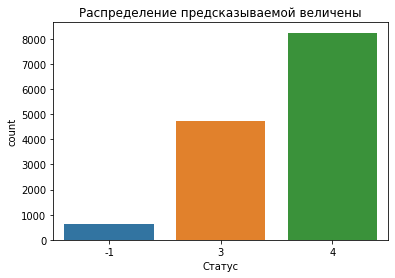

In [133]:
sns.countplot(x = "Статус" , data  = df).set_title('Распределение предсказываемой величены')

Text(0.5, 1.0, 'Распределение года поступления')

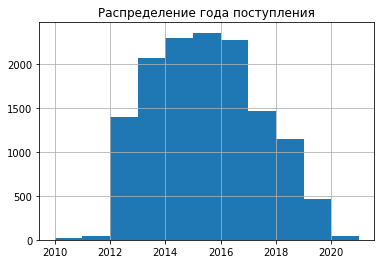

In [134]:
df["Год_Поступления"].hist(bins = 11, range = [2010, 2021]).set_title('Распределение года поступления')

Обратим внимание на часть столбцов с постоянными значениями

In [135]:
df["Пособие"].value_counts()

0.0    13584
Name: Пособие, dtype: int64

In [136]:
df["Опекунство"].value_counts()

0.0    13578
1.0        6
Name: Опекунство, dtype: int64

In [137]:
df.columns.values

array(['ID', 'Код_группы', 'Год_Поступления', 'Пол', 'Основания',
       'Изучаемый_Язык', 'Дата_Рождения', 'Уч_Заведение',
       'Где_Находится_УЗ', 'Год_Окончания_УЗ', 'Пособие', 'Страна_ПП',
       'Регион_ПП', 'Город_ПП', 'Общежитие', 'Наличие_Матери',
       'Наличие_Отца', 'Страна_Родители', 'Опекунство', 'Село',
       'Иностранец', 'КодФакультета', 'СрБаллАттестата', 'Статус'],
      dtype=object)

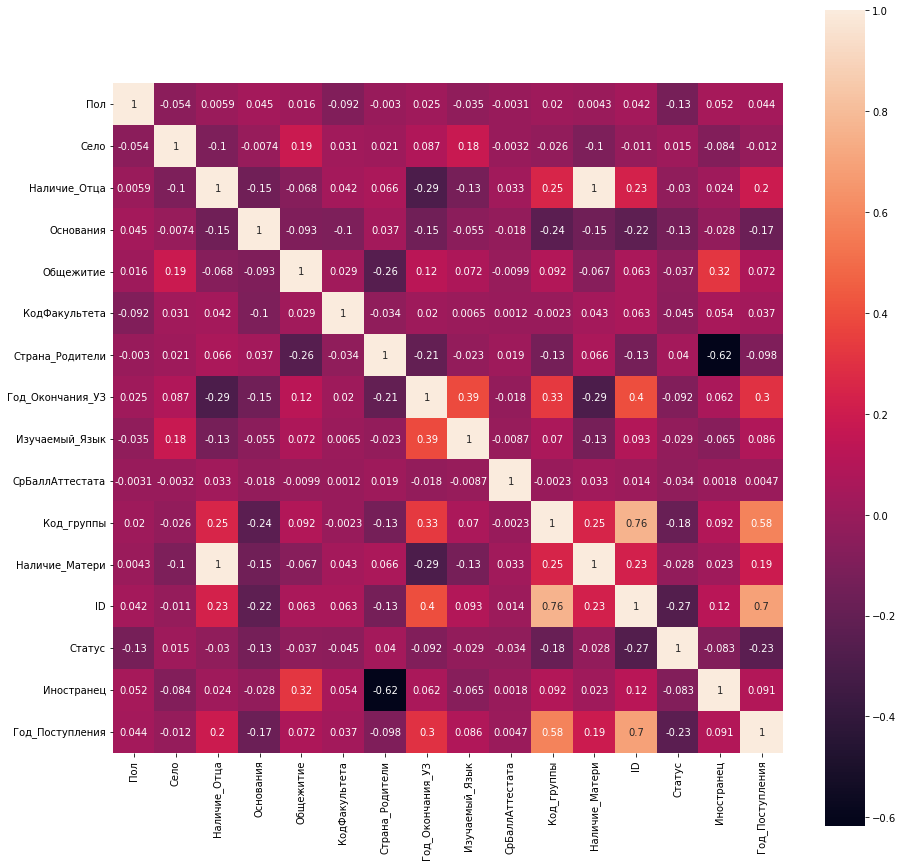

In [138]:
plt.rcParams['figure.figsize']=(15,15)


df_corr = list(set(df.columns.values) - set(['Опекунство','Пособие']))
g = sns.heatmap(df[df_corr].corr(), square = True, annot=True)

In [139]:
categorical_features = (df.select_dtypes(include=['object']).columns.values)
categorical_features

array(['Дата_Рождения', 'Уч_Заведение', 'Где_Находится_УЗ', 'Страна_ПП',
       'Регион_ПП', 'Город_ПП'], dtype=object)

In [140]:
numerical_features = df.select_dtypes(include = ['float64', 'int64']).columns.values
numerical_features

array(['ID', 'Код_группы', 'Год_Поступления', 'Пол', 'Основания',
       'Изучаемый_Язык', 'Год_Окончания_УЗ', 'Пособие', 'Общежитие',
       'Наличие_Матери', 'Наличие_Отца', 'Страна_Родители', 'Опекунство',
       'Село', 'Иностранец', 'КодФакультета', 'СрБаллАттестата', 'Статус'],
      dtype=object)

In [141]:
df.value_counts('Пособие')

Пособие
0.0    13584
dtype: int64

In [142]:
df.shape

(13584, 24)

In [143]:
df = df.drop(columns=['Уч_Заведение', 'Где_Находится_УЗ', 'Дата_Рождения', 'Страна_ПП', 'Регион_ПП', 'Город_ПП'])

In [144]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
df1 = df
X = df1.drop("Статус", axis = 1)
y = df1["Статус"]
X_scale = scale.fit_transform(X)
X_scale_test = scale.fit_transform(df1)

In [145]:
df1.head()

,ID,Код_группы,Год_Поступления,Пол,Основания,Изучаемый_Язык,Год_Окончания_УЗ,Пособие,Общежитие,Наличие_Матери,Наличие_Отца,Страна_Родители,Опекунство,Село,Иностранец,КодФакультета,СрБаллАттестата,Статус
0,72716,16019,2015,0,2,1,2014.0,0.0,0.0,0,0.0,10,0.0,0.0,0.0,41.0,4.294,3
1,63306,14895,2010,1,4,0,0.0,0.0,0.0,1,1.0,10,0.0,0.0,0.0,28.0,67.000,4
2,82469,20103,2017,0,1,1,2017.0,0.0,0.0,1,1.0,10,0.0,0.0,0.0,41.0,4.133,4
3,81661,19838,2017,0,0,1,2017.0,0.0,0.0,1,1.0,10,0.0,0.0,0.0,35.0,74.000,4
4,81509,19803,2017,0,0,1,2017.0,0.0,0.0,1,1.0,10,0.0,0.0,0.0,28.0,53.000,4


In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13584 entries, 0 to 13583
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                13584 non-null  int64  
 1   Код_группы        13584 non-null  int64  
 2   Год_Поступления   13584 non-null  int64  
 3   Пол               13584 non-null  int64  
 4   Основания         13584 non-null  int64  
 5   Изучаемый_Язык    13584 non-null  int64  
 6   Год_Окончания_УЗ  13584 non-null  float64
 7   Пособие           13584 non-null  float64
 8   Общежитие         13584 non-null  float64
 9   Наличие_Матери    13584 non-null  int64  
 10  Наличие_Отца      13584 non-null  float64
 11  Страна_Родители   13584 non-null  int64  
 12  Опекунство        13584 non-null  float64
 13  Село              13584 non-null  float64
 14  Иностранец        13584 non-null  float64
 15  КодФакультета     13584 non-null  float64
 16  СрБаллАттестата   13584 non-null  float6

## Выделим выборки

In [147]:
df.dtypes[df.dtypes == 'float64'].index.values

array(['Год_Окончания_УЗ', 'Пособие', 'Общежитие', 'Наличие_Отца',
       'Опекунство', 'Село', 'Иностранец', 'КодФакультета',
       'СрБаллАттестата'], dtype=object)

In [148]:
numerical_features = df.select_dtypes(include = ['float64', 'int64']).columns.values


Поместим все столбцы object в массив, для их дальнейшего удаления

In [149]:
mass_object = df.dtypes[df.dtypes == "object"].index.values

In [150]:
mass_object = np.append(mass_object, "Статус")

In [151]:
X = df.drop(mass_object, axis = 1)
y = df[["Статус"]]

In [152]:
X.shape

(13584, 17)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Обучение модели

In [153]:
from sklearn.ensemble import GradientBoostingClassifier # Импортируем GradientBoostingClassifier
from sklearn.metrics import roc_auc_score
clf2 = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.09, random_state=1)
clf2.fit(X_train, y_train) # обучение

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(learning_rate=0.09, n_estimators=1000,
                           random_state=1)

## Оценка точности

In [154]:
clf2.score(X_test, y_test)
y_pred = clf2.predict(X_test) # предсказание

In [155]:
f1_score(y_test, y_pred, average='macro', zero_division = 0)

0.7764444015594405

# Cоздание файла с ответом

In [58]:
df_test = pd.read_csv("/content/test_dataset_test.csv")
df_submission = pd.read_csv("/content/sample_submission.csv")

##Произведем замены, как в тренировочном файле

In [59]:
df_test.shape

(6691, 23)

In [60]:
df_test.value_counts('Страна_Родители')

Страна_Родители
Россия                    6073
Казахстан                  239
Китай                       82
Таджикистан                 45
Кыргызстан                  24
Киргизия                    14
Кыргызская Республика        3
Узбекистан                   3
Афганистан                   2
РОССИЯ                       2
Туркменистан                 2
Кыргызия                     1
Монголия                     1
Республика Таджикистан       1
Чеченская республика         1
dtype: int64

In [61]:
df_test['Страна_Родители'] = df_test['Страна_Родители'].replace({'РОССИЯ': "Россия", 'Кыргызская Республика': "Кыргызстан", 'Республика Таджикистан' : "Таджикистан", "Республика Таджикистан" : "Таджикистан"})

In [62]:
df_test.value_counts('Страна_Родители')

Страна_Родители
Россия                  6075
Казахстан                239
Китай                     82
Таджикистан               46
Кыргызстан                27
Киргизия                  14
Узбекистан                 3
Афганистан                 2
Туркменистан               2
Кыргызия                   1
Монголия                   1
Чеченская республика       1
dtype: int64

In [63]:
df_test['Страна_Родители'] = df_test['Страна_Родители'].replace({"Россия" : 10, "Казахстан" : 3, "Китай" : 5, "Таджикистан" : 11, "Кыргызстан" : 6, "Киргизия" : 4, "Узбекистан" : 13, "Монголия" : 8, "Афганистан" : np.nan, "Туркменистан" : np.nan, "Кыргызия" : np.nan, "Монголия" : np.nan, "Чеченская республика" : np.nan})



---



In [ ]:
#df_test = df_test.drop(columns=['Код_группы', 'КодФакультета', 'Год_Окончания_УЗ' , 'Дата_Рождения', 'Уч_Заведение', 'Где_Находится_УЗ', 'Страна_ПП', 'Регион_ПП', 'Город_ПП', 'Страна_Родители'])

In [64]:
df_test['Пол'] = df_test['Пол'].replace({'жен': "Жен"})

In [65]:
df_test['Пол'] = df_test['Пол'].replace({'Жен': 0, 'Муж' : 1})

In [66]:
df_test['Основания'] = df_test['Основания'].replace({"ОО" : 2, "СН" : 3, "БН" : 0, "ДН" : 1, "ЦН" : 4, "ЛН" : np.nan})

In [67]:
df_test['Изучаемый_Язык'] = df_test['Изучаемый_Язык'].replace({'Англиийский': "Английский язык", 'Иностранный язык (Английский)': "Английский язык", "Английский, немецкий языки" : np.nan})

In [68]:
df_test['Изучаемый_Язык'] = df_test['Изучаемый_Язык'].replace({'Английский язык': 0, 'Немецкий язык': 1, "Французский язык" : 3, "Русский язык" : 2, "два языка" : 3})

In [69]:
df_test = df_test.drop(columns=['Уч_Заведение', 'Где_Находится_УЗ', 'Дата_Рождения', 'Страна_ПП', 'Регион_ПП', 'Город_ПП'])

In [70]:
df_test.shape

(6691, 17)



---



Провем те же манипуляции с данными что и на обучении

In [71]:
mass_object = df.dtypes[df.dtypes == "object"].index.values
df_test = df_test.drop(mass_object, axis = 1)

In [72]:
df_test = df_test.fillna(0)

In [74]:
df_test_pred = clf2.predict(df_test)

In [75]:
df_submission["Статус"] = df_test_pred
df_submission.head(4)

,ID,Статус
0,64996,4
1,71837,4
2,86587,4
3,73673,-1


In [76]:
df_submission.to_csv("/content/submission.csv", index=False)